## Aperture photometry on the PAL5 globular cluster - epochs

This notebook now computes photometry on all available time epochs for the Palomar 5 globular cluster

In [1]:
import math
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits # FITS file management
from astropy.stats import sigma_clipped_stats # use within star detection
from photutils import aperture_photometry # used to perform photometry using apertures
from photutils import DAOStarFinder # star finding algorithm
from photutils import CircularAperture, CircularAnnulus

EPOCH NUMBER: 1
FLUXCONV = 0.1447
EXPTIME = 81.4431


Number of stars detected: 576


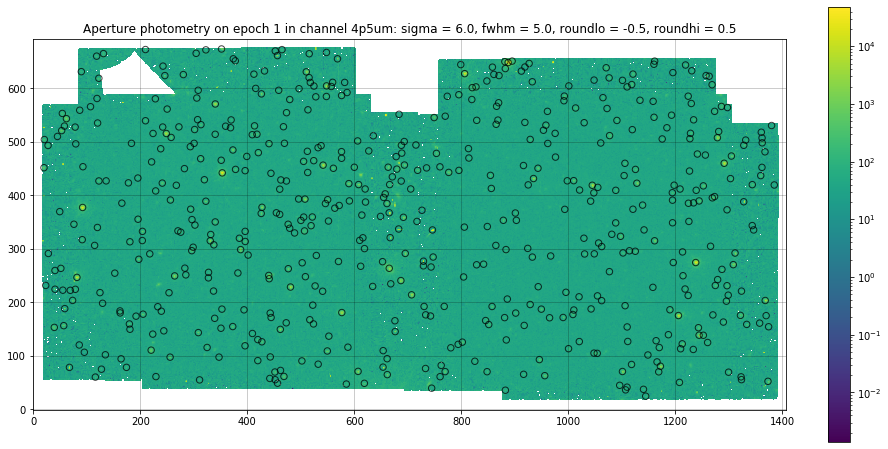

 id      xcenter       ...    bkgsub_flux        apparent_mag   
           pix         ...                                      
--- ------------------ ... ------------------ ------------------
  1 1144.5398960882035 ...                nan                nan
  2  882.2908973266927 ...  3.505222822793212  16.83516586643114
  3 1106.9970364585645 ... 2.6662080494952876  17.13221985517759
  4 1140.4174500586578 ...  2.299621186357689 17.292814190480662
  5  744.4846726716138 ...                nan                nan
  6 1109.6827136952575 ...  2.475814143726369  17.21265984425526
  7 1095.9627637847886 ... 3.1619463696941565  16.94706869453285
  8  585.0685895969166 ...                nan                nan
  9  456.4243453252711 ... 0.6470559645727441 18.669600331088624
 10  618.7377977303526 ... 7.2920097494057385 16.039836841738605
...                ... ...                ...                ...
567   456.271207656228 ...  34.85649378071159 14.341245695244503
568  131.0631015899529 ..

Number of stars detected: 588


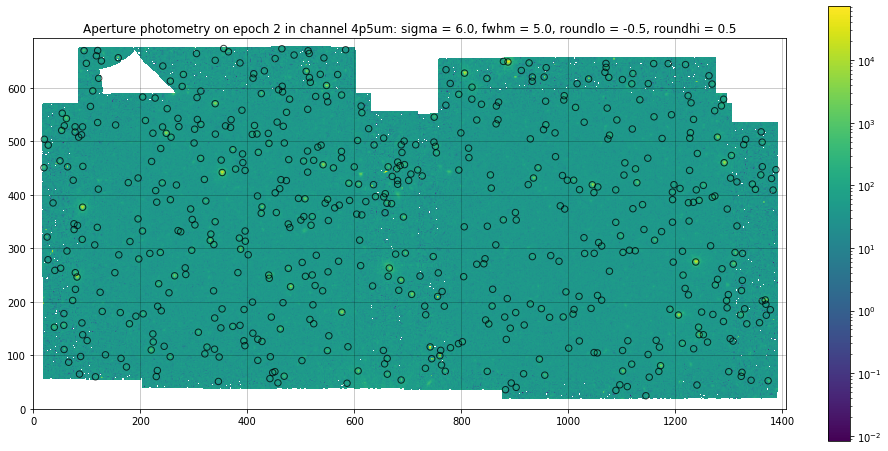

 id      xcenter       ...     bkgsub_flux         apparent_mag   
           pix         ...                                        
--- ------------------ ... -------------------- ------------------
  1 1144.9456998695312 ...                  nan                nan
  2 1088.8955045797884 ...     1.60680392256711 17.682047735147748
  3  882.5174825961943 ...   2.2885150959973437 17.298070489425076
  4  902.4391281259956 ...    2.529814802335292 17.189233119898603
  5  1110.188841240814 ...   3.0554584202522426 16.984263998162742
  6 1096.2308758157217 ...    2.948633188604251 17.022903069653953
  7 1240.3962170911605 ... -0.04875874968313183                nan
  8  586.3431550211643 ...   1.6992895992481885 17.621286445184257
  9  893.2841780035438 ...    1.521339225754325  17.74138978549813
 10 457.12409082735223 ...    1.419147424756727 17.816886159697344
...                ... ...                  ...                ...
579  487.3659625096637 ...   1.1711922289371521 18.02538448806

Number of stars detected: 572


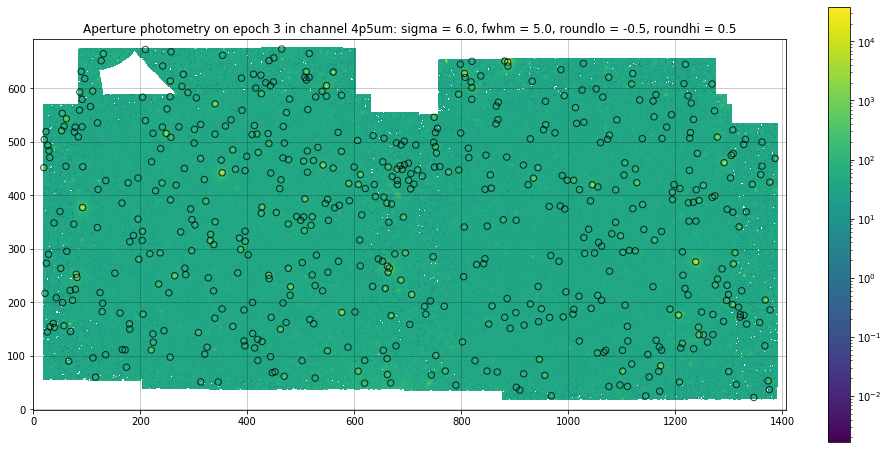

 id      xcenter       ...     bkgsub_flux        apparent_mag   
           pix         ...                                       
--- ------------------ ... ------------------- ------------------
  1 1346.7508964752585 ...                 nan                nan
  2  1144.461758086589 ...  3.8349559254097803   16.7375540007485
  3  968.2839854209657 ...  3.0693271699613986 16.979346983783124
  4  1170.775520523702 ... -0.7120417883716428                nan
  5  909.2951735591696 ...   1.673978021739395   17.6375805641097
  6 1375.6315297859956 ... -3.4849155107850662                nan
  7  902.6701231935624 ...  1.3710095328095653 17.854353757057915
  8 1075.8360766346084 ...  0.3342729767201379 19.386701771329346
  9 1110.4462115237823 ...   2.185066483070943 17.348293304827784
 10  789.7830018969318 ...   1.556190234256031 17.716798229303294
...                ... ...                 ...                ...
563  880.8414151100208 ...                 nan                nan
564  126.8

Number of stars detected: 592


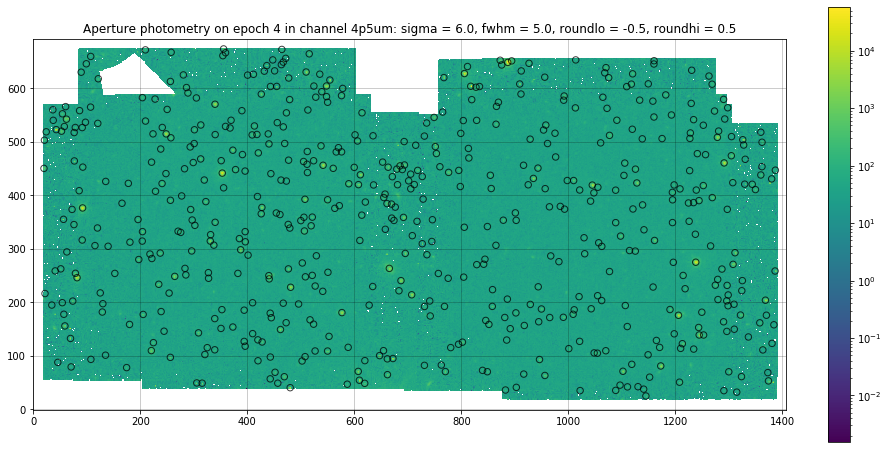

 id      xcenter       ...     bkgsub_flux        apparent_mag   
           pix         ...                                       
--- ------------------ ... ------------------- ------------------
  1 1144.9416857640838 ...                 nan                nan
  2  1314.738938768159 ... -0.9792373652503711                nan
  3  1290.680763274013 ...  1.7478705270417279  17.59068179516707
  4  882.4963956508215 ...   3.177616367808425 16.941701283676675
  5 1021.9916932895318 ...  0.8567710398896663 18.364792997611556
  6 1088.5127393518067 ...    2.07273492259373 17.405595531572565
  7 1140.7900485442226 ...  2.8924811063340132 17.043778616263072
  8  902.7379272873204 ...  1.8839553478499136 17.509278430213445
  9  480.0527199105622 ...                 nan                nan
 10 1110.4698345952193 ...  3.0398282925131035  16.98983231137515
...                ... ...                 ...                ...
583 1013.7848292322293 ...                 nan                nan
584 471.74

Number of stars detected: 574


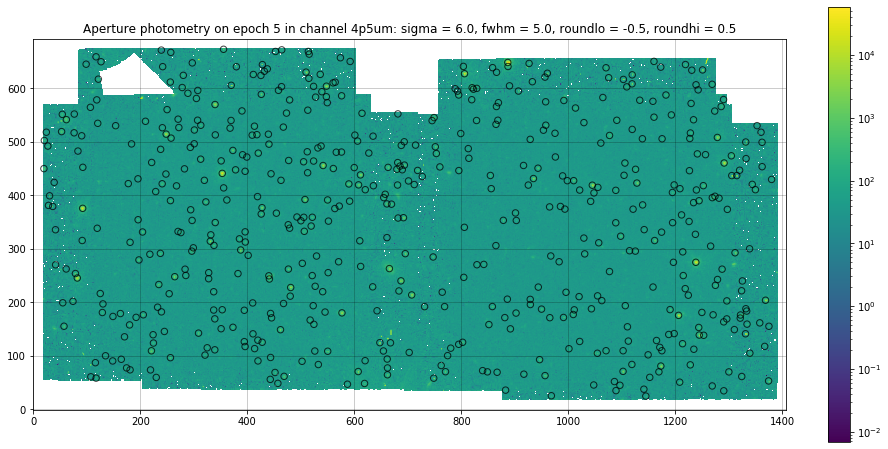

 id      xcenter       ...     bkgsub_flux         apparent_mag   
           pix         ...                                        
--- ------------------ ... -------------------- ------------------
  1  1144.781845351871 ...                  nan                nan
  2   968.193933576146 ...   2.6233271314306217 17.149823816051303
  3 1089.0207191402158 ...    1.013258460623686 18.182654346445563
  4 1290.4824527640062 ...    2.048833657743788 17.418188193315338
  5  882.6488961304347 ...   2.9254349779873188  17.03147881899298
  6  1141.162594105816 ...   2.0880435247126496 17.397606075380306
  7 1268.9093912250364 ...    1.608178969003091  17.68111899752136
  8 1047.4440282966223 ...   1.3658108044463495 17.858478583459387
  9 1096.3892534180495 ...    3.098233959503852  16.96916941857465
 10   587.097624283154 ...   1.0988333880650873    18.094625325845
...                ... ...                  ...                ...
565 1160.0385068111693 ...                  nan               

Number of stars detected: 587


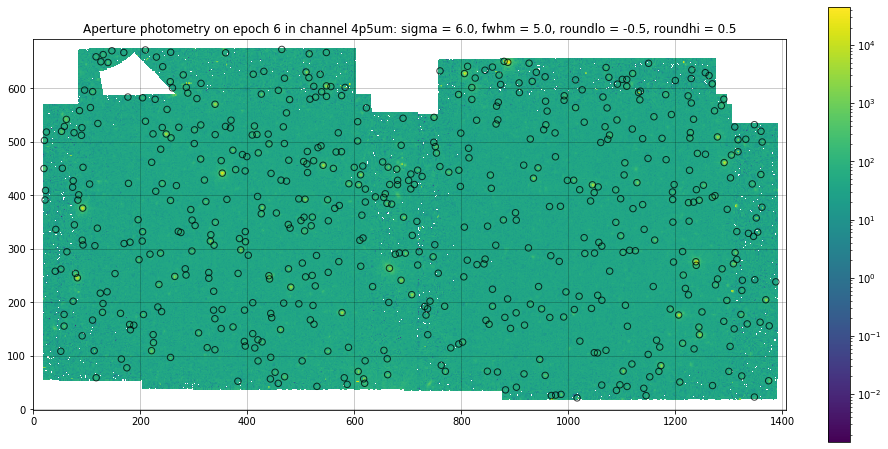

 id      xcenter       ...     bkgsub_flux        apparent_mag   
           pix         ...                                       
--- ------------------ ... ------------------- ------------------
  1 1016.3232602275673 ...                 nan                nan
  2 1347.7232563111438 ...                 nan                nan
  3  968.1377994993339 ...   73.88328147764693 13.525589503069371
  4 1145.2559726991262 ...   3.434073749918081 16.857430898820155
  5  976.2185359049091 ...                 nan                nan
  6  986.3440780070698 ...                 nan                nan
  7  1089.891812247196 ...   1.761122333279764 17.582481132022103
  8  882.5506387923108 ...  1.8772696599095497 17.513138290275364
  9 1140.9809870232855 ...  1.9930944045626646 17.448135268563252
 10  902.9094237303437 ...  1.9264574763458189 17.485056375682834
...                ... ...                 ...                ...
578  230.0436046115716 ...   1.560771857935463 17.713606378943354
579 130.47

Number of stars detected: 570


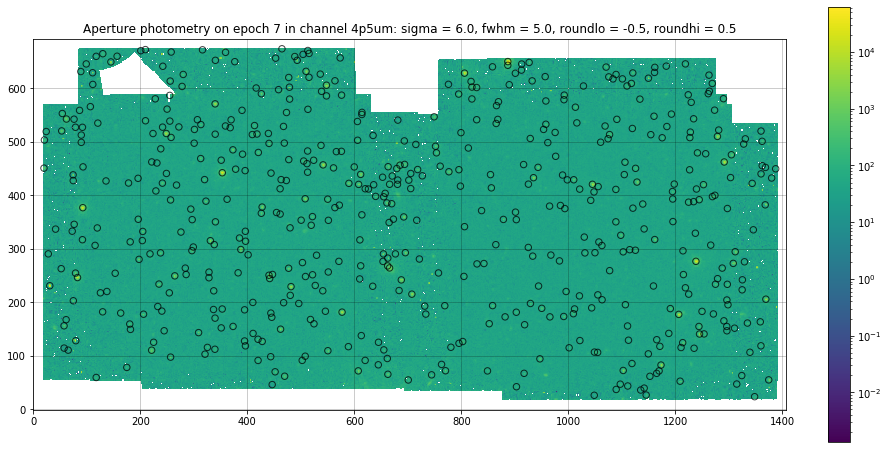

 id      xcenter       ...     bkgsub_flux        apparent_mag   
           pix         ...                                       
--- ------------------ ... ------------------- ------------------
  1 1348.1453556578072 ...                 nan                nan
  2 1048.3954291778673 ... 0.38073141598823934 19.245408158253344
  3   1145.40155743224 ...  2.9315404047638265  17.02921523246081
  4  1135.232240571349 ... -0.4291741925548806                nan
  5 1089.3883650143946 ...  0.8311449066634408  18.39776307376191
  6   1141.70162240737 ...  1.6974649887036135 17.622452879712906
  7   903.017734443153 ...   1.565254053098774 17.710492850751933
  8 1110.9818826129576 ...   2.740129244448907 17.102527323839997
  9 446.41912716902107 ...  -2.456700894820369                nan
 10  1097.034045817457 ...  3.4072202648655647  16.86595441809023
...                ... ...                 ...                ...
561 504.12516215062044 ...  -1.923508524925318                nan
562  129.8

Number of stars detected: 592


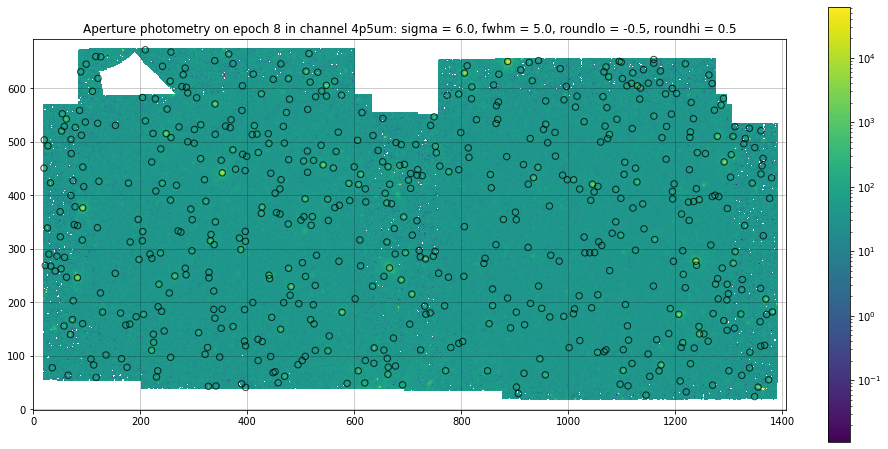

 id      xcenter       ...     bkgsub_flux         apparent_mag   
           pix         ...                                        
--- ------------------ ... -------------------- ------------------
  1 1348.0835274729357 ...                  nan                nan
  2 1145.2521467691158 ...   3.2245771056720622 16.925773027846578
  3  906.3829167594121 ...  -2.3689906307505426                nan
  4 1220.2953903098546 ... -0.30388909810642994                nan
  5   396.831001679112 ...                  nan                nan
  6  903.0270558806393 ...   1.1370472620757612 18.057508651367478
  7  1354.629605569884 ...   401.44512339798143 11.687889476724276
  8 327.23382661862337 ...                  nan                nan
  9 341.38849848930107 ...                  nan                nan
 10 1111.3734930898688 ...   2.4073218145930064 17.243119564999144
...                ... ...                  ...                ...
583  338.9821554567517 ...   1.9112836760308898 17.49364206688

Number of stars detected: 597


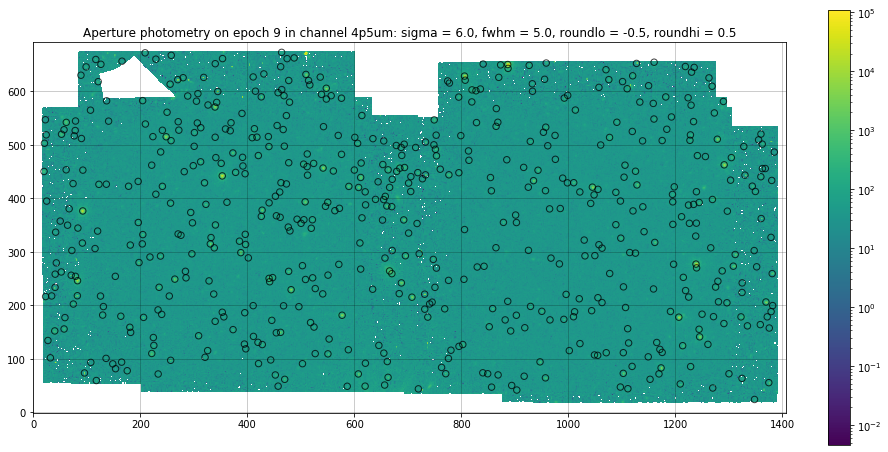

 id      xcenter       ...     bkgsub_flux         apparent_mag   
           pix         ...                                        
--- ------------------ ... -------------------- ------------------
  1 1347.9959064527486 ...                  nan                nan
  2  903.6155112954518 ...   1.5803102675190814  17.70009903884533
  3  719.7034594181097 ...  0.23519496550464863  19.76838489042815
  4 1111.2480168798245 ...   2.6417557542766428 17.142223288131056
  5 1269.8519223559895 ... -0.06799748378153038                nan
  6  856.4697715974785 ... 0.018704314865990064  22.51710043148503
  7 1097.2238993060573 ...    2.942771617735792  17.02506354649022
  8  586.6888465017281 ...   1.2148974798660594  17.98560586537554
  9  620.1036168396142 ...    7.359631721951466 16.029814736667607
 10 457.52816821921294 ...    1.705768675362923 17.617154606352987
...                ... ...                  ...                ...
588  1160.276004255819 ...                  nan               

Number of stars detected: 587


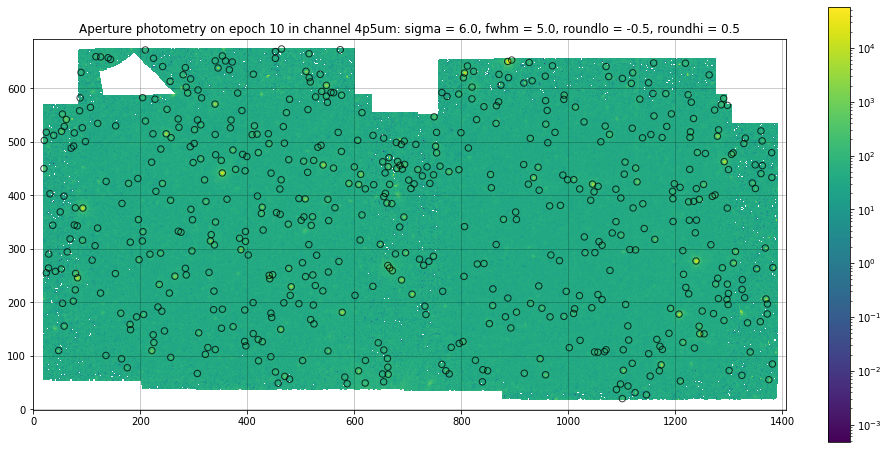

 id      xcenter       ...     bkgsub_flux        apparent_mag   
           pix         ...                                       
--- ------------------ ... ------------------- ------------------
  1 1100.8614294237022 ...                 nan                nan
  2 1145.7866053963935 ...   3.629332420401816 16.797388072744322
  3 1124.7627776521701 ...  12.272963499936052 15.474581336778057
  4 1089.9508074513046 ...  2.0749695874674097 17.404425604067974
  5  1111.344742782834 ...  1.8322290399276364  17.53950553779079
  6  586.4535747183342 ...  1.4981619665862482 17.758058024414886
  7 1097.5075676402234 ...  2.8766971006548423  17.04971960423961
  8  457.6484723496922 ...  1.5614132038352808 17.713160324363486
  9  620.2449819301999 ...   8.195041080635214 15.913077105895509
 10  839.3831354340822 ... -1.1425275045614616                nan
...                ... ...                 ...                ...
578 452.36128513695917 ...    2.90883613766186 17.037656800840836
579 139.83

Number of stars detected: 578


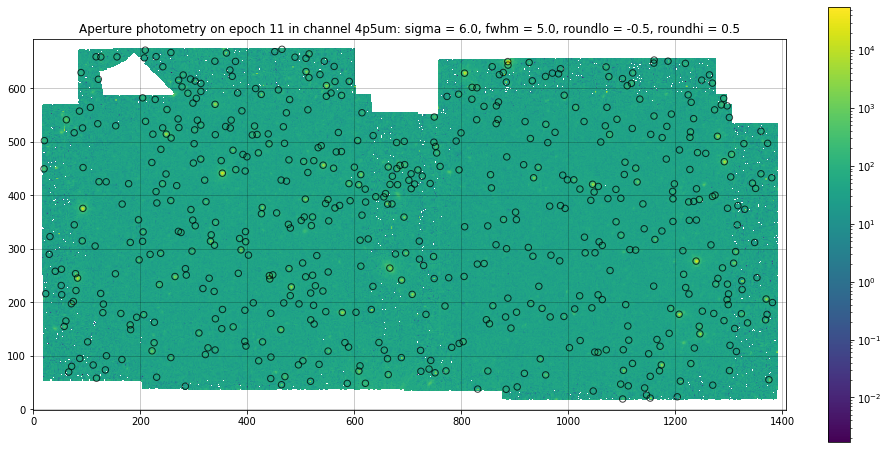

 id      xcenter       ...     bkgsub_flux         apparent_mag   
           pix         ...                                        
--- ------------------ ... -------------------- ------------------
  1  1101.505766197628 ...                  nan                nan
  2  1153.005070064683 ...                  nan                nan
  3 1203.6236927791729 ...                  nan                nan
  4 1146.1150322488365 ...   2.6629051054173845 17.133565717546286
  5 1046.4975251826786 ...   0.5656650266965683  18.81555662207994
  6  830.5241347921777 ...                  nan                nan
  7  883.6865161979792 ...   2.5866488923123754  17.16511123767138
  8 1142.5859147477636 ...    3.121365439440335  16.96109339971191
  9  904.3733576708047 ...   0.6665009019225919 18.637453089708515
 10 284.13858626810725 ...                  nan                nan
...                ... ...                  ...                ...
569  117.3218200334574 ...    2.917253805632784  17.0345194056

Number of stars detected: 583


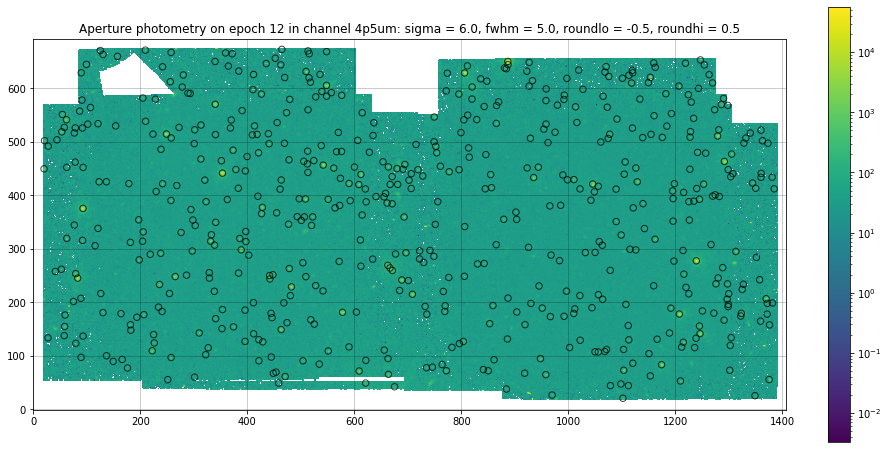

 id      xcenter       ...     bkgsub_flux        apparent_mag   
           pix         ...                                       
--- ------------------ ... ------------------- ------------------
  1 1102.0242293192464 ...                 nan                nan
  2 1348.8529031480198 ...                 nan                nan
  3  969.5894295047254 ...  2.2915513041775437 17.296630981199083
  4  884.2839671759804 ...  1.2936915552881696  17.91737808519004
  5  675.0983821048271 ...                 nan                nan
  6  1078.603267477046 ...  1.1539332787494592 18.041503197507165
  7 1112.0869551975454 ...  2.2024463629500035  17.33969159165688
  8 1098.1149589810245 ...   3.963615573988259 16.701726127852798
  9   458.550725771248 ...                 nan                nan
 10  621.1173491617753 ...                 nan                nan
...                ... ...                 ...                ...
574  130.2512418102751 ...   5.919380926500637 16.266264221392007
575  515.5

In [5]:
## BASE DATA DIRECTORY ##

base_dir = 'PAL5_data/*/'
channel = '4p5um'

## PARAMETERS ##

sigma_val = 6.
fwhm = 5.
r_ap = 6.
r_in = 6.
r_out = 14.
roundlo = -0.5
roundhi = 0.5

## CHANNEL ##

if channel == '3p6um':
    aper_corr = 1.125
    zmag = 18.8
elif channel == '4p5um':
    aper_corr = 1.120
    zmag = 18.32

## LOOP COUNTER ##
j = 0

## FITS FILE SELECTION ##
for file in glob.glob(base_dir+'PAL5__e[0-9]_'+channel+'.fits', recursive = True) + glob.glob(base_dir+'PAL5__e[0-9][0-9]_'+channel+'.fits', recursive = True):
    j += 1
    print('EPOCH NUMBER: {}'.format(j))
    ## OPENING FITS FILE AND EXTRACTING DATA ##
    with fits.open(file) as header_list:
        header = header_list[0].header
        fluxconv = header['FLUXCONV']
        exptime = header['EXPTIME']
        counts = exptime / fluxconv
        image_data = fits.getdata(file, ext = 0)
        data = image_data * counts
        print('FLUXCONV = {}\nEXPTIME = {}'.format(fluxconv, exptime))

    ## SOURCE DETECTION ##
    mean_val, median_val, std_val = sigma_clipped_stats(data, sigma = sigma_val)
    
    daofind = DAOStarFinder(fwhm = fwhm, threshold = sigma_val * std_val, roundlo = roundlo, roundhi = roundhi)
    sources = daofind(data) #- median_val) # necessary here?
    print('Number of stars detected: {}'.format(len(sources)))
    positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
    apertures = CircularAperture(positions, r = 6.)

    plt.imshow(data, cmap = 'viridis', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
    plt.colorbar(fraction = 0.05)
    apertures.plot(color = 'black', lw = 1., alpha = .75)
    plt.title('Aperture photometry on epoch {} in channel {}: sigma = {}, fwhm = {}, roundlo = {}, roundhi = {}'
              .format(j, channel, sigma_val, fwhm, roundlo, roundhi))
    plt.grid(b = True, which = 'major', lw = .5, alpha = .4, color = 'black')
    plt.gcf().set_size_inches(15, 8)
    plt.savefig(r'aperture_photometry_output_images/aperture_phot_epoch{}_channel{}.png'.format(j, channel))
    plt.show()
    plt.close()
    
    ## APERTURE PHOTOMETRY ##
    
    positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
    circular_apertures = CircularAperture(positions, r = 6.)
    annuli_apertures = CircularAnnulus(positions, r_in = 6., r_out = 14.)
    apertures = [circular_apertures, annuli_apertures]

    # initial aperture photometry table
    phot_init = aperture_photometry(data, apertures)

    # background subtraction using sigma-clipped median and annuli
    annulus_masks = annuli_apertures.to_mask(method = 'center')

    bkg_median = []
    for mask in annulus_masks:
        annulus_data = mask.multiply(data)
        annulus_data_1d = annulus_data[mask.data > 0] # extract 1D array of data values
        _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d) # utilise sigma clipping on the annulus masks
        bkg_median.append(median_sigclip)

    bkg_median = np.array(bkg_median)
    # now append bkg_median, aperture background and aperture sum background values to photometry data
    phot_init['annulus_median'] = bkg_median
    phot_init['aper_bkg'] = bkg_median * circular_apertures.area
    phot_init['aper_sum_bkgsub'] = phot_init['aperture_sum_0'] - phot_init['aper_bkg']

    ## APPARENT MAGNITUDE ##
    
    #aper_corr = 1.125 # aperture correction for 337 (6,6,14) apertures in channel 1, given in IRAC handbook §4.10
    #zmag = 18.8       # from IRAC handbook §4.8

    phot = phot_init                    # redefine photometry table for ease
    phot['bkgsub_flux'] = float('NaN')  # populate new column to convert into flux
    phot['apparent_mag'] = float('NaN') # populate a new table (very quirky here, nans?)

    for i in range(0, len(phot)):
        phot['bkgsub_flux'][i] = phot['aper_sum_bkgsub'][i] * fluxconv / exptime
        for i in range(0, len(phot)):
            if phot['bkgsub_flux'][i] >= 0:
                phot['apparent_mag'][i] = zmag - 2.5 * math.log10(phot['bkgsub_flux'][i] * aper_corr)

    # export into csv file
    phot['id', 'xcenter', 'ycenter', 'apparent_mag'].write(r'C:\Users\lukeb\Documents\MPhys_RRLs\output_files\aperphot_epoch{}_{}.txt'.format(j, channel), format = 'csv', overwrite = True)
    print(phot)